**Airbnb**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

**Business Problem**
What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?

Dataset Story
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

The data contains 48895 rows and 16 columns.

The data contains information about the id, host name, host_id, host_name, neighbourhood_group, neighbouhood, latitude, longitude, room type, price, minimum number of nights, number of reviews, last review, reviews per month, calculated host listings count, and availability during the year.

1. id: Unique ID of the Airbnb listing.

2. name: Name of the listed property.
3. host_id: Unique ID of the host.
4. host_name: Name of the host.
5. neighbourhood_group: General region of the location (neighborhood), e.g., Brooklyn, Manhattan, Queens, Staten Island, and Bronx.
6. neighbourhood: Specific neighborhood where the property is located.
7. latitude: Latitude coordinate of the property.
8. longitude: Longitude coordinate of the property.
9. room_type: Type of room (e.g., Private room, Shared room, Entire home/apt).
10. price: Price per night (in USD).
11. minimum_nights: Minimum number of nights guests are required to stay.
12. number_of_reviews: Number of reviews the listing has received.
13. last_review: Date of the last review.
14. reviews_per_month: Average number of reviews per month.
15. calculated_host_listings_count: Total number of properties listed by the host.
16. availability_365: Number of days the property is available in a year

In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('/content/Airbnb_datanew.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
# data cleaning

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
rename_col = {
    'id' : 'listing_id',
    'name' : 'listing_name',
    'number_of_reviews' : 'total_reviews',
    'calculated_host_listings_count' : 'host_listings_count'
}

In [6]:
df = df.rename(columns = rename_col)
df

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
df.shape

(48895, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [9]:
# checking for duplicates

df1 = df.duplicated().sum()
df1

0

In [10]:
# checked duplicates and gave the number of rows after removing it

df = df.drop_duplicates()
df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

In [11]:
# null values

df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [12]:
# host_name and listing_name do not have much null values with comparison to the other null value columns
# so we are filling these columns with substitutes

df['listing_name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)

In [13]:
# null values are replaced

df[['host_name','listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

In [14]:
df = df.drop(['last_review'], axis=1)

In [15]:
# last_review is not needed in the analysis , so dropped in the above step

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48895 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48895 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listings_count  48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

In [17]:
df['reviews_per_month'] = df['reviews_per_month'].replace(to_replace=np.nan,value=0).astype=('int64')

# zero over here means no review

In [18]:
# check the dataset with updated columns, null values and last_revoew column removed

df.sample(5)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
34292,27204768,Wicked Chill Artist Space!,4356698,Youmie,Manhattan,Washington Heights,40.85045,-73.93493,Private room,75,2,20,int64,1,357
20359,16259438,Private Sunny Lofted Bedroom in East Williamsburg,60146124,Diana,Brooklyn,Williamsburg,40.71416,-73.93852,Private room,38,21,13,int64,1,26
47565,35804587,1BD WITH PRIVATE BATHROOM - VERY COZY & 42 INC...,73676969,Meezy,Bronx,Williamsbridge,40.87877,-73.85044,Private room,55,2,0,int64,3,35
39268,30596912,Warm & sweet private bedroom,104167105,Max,Manhattan,Upper West Side,40.78484,-73.97862,Private room,120,2,8,int64,1,0
37715,29895573,★Roof views/Quick to Times Sq/NY Presby/Columb...,22388757,Jordan,Manhattan,Washington Heights,40.85114,-73.93754,Private room,55,2,6,int64,2,169


In [19]:
df['listing_id'].nunique()

48895

In [20]:
df['neighbourhood'].nunique()

221

In [21]:
df['neighbourhood_group'].nunique()

5

In [22]:
df['host_name'].nunique()

11453

In [23]:
df['listing_name'].nunique()

47897

In [24]:
df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [40]:
df.describe(include='O')

,listing_name,host_name,neighbourhood_group,neighbourhood,room_type,reviews_per_month
count,45918,45918,45918,45918,45918,45918
unique,44979,11009,5,219,3,1
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,int64
freq,18,383,19501,3732,22784,45918


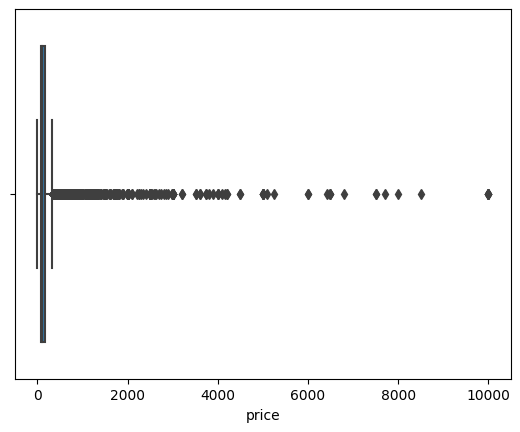

In [25]:
sns.boxplot(x=df['price'])
plt.show()

In [26]:
import plotly.express as px

In [27]:
fig = px.box(df, y='price')
fig.show()

In [28]:
# IQR technique

def iqr_solution(DFcolumn):
  q1 = np.percentile(DFcolumn,25)
  q3 = np.percentile(DFcolumn,75)
  iqr=q3-q1
  lower_range= q1 - (1.5 * iqr)
  upper_range= q3 + (1.5 * iqr)

  return lower_range, upper_range


In [29]:
lower_bound, upper_bound = iqr_solution(df['price'])
lower_bound

-90.0

In [30]:
upper_bound

334.0

In [31]:
# lower_bound and upper_bound are objects created for upper fence and lower fence accordingly
# this below code has taken into consideration all the data apart from outliers

lower_bound, upper_bound = iqr_solution(df['price'])

df = df[(df.price>lower_bound) & (df.price<upper_bound)]

(45918, 15)


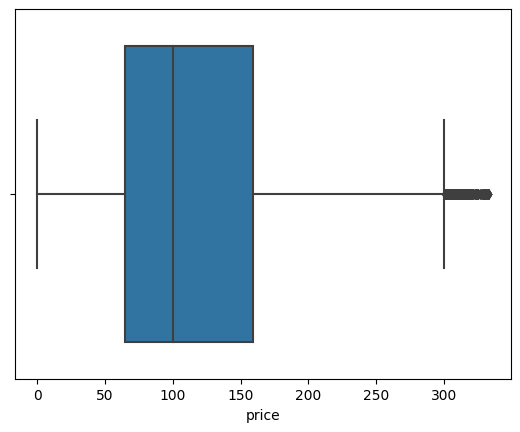

In [32]:
sns.boxplot(x=df['price'])
print(df.shape)

In [33]:
fig = px.box(df, y='price')
fig.show()

Text(0.5, 1.0, 'Distribution of the Airbnb Pricing column')

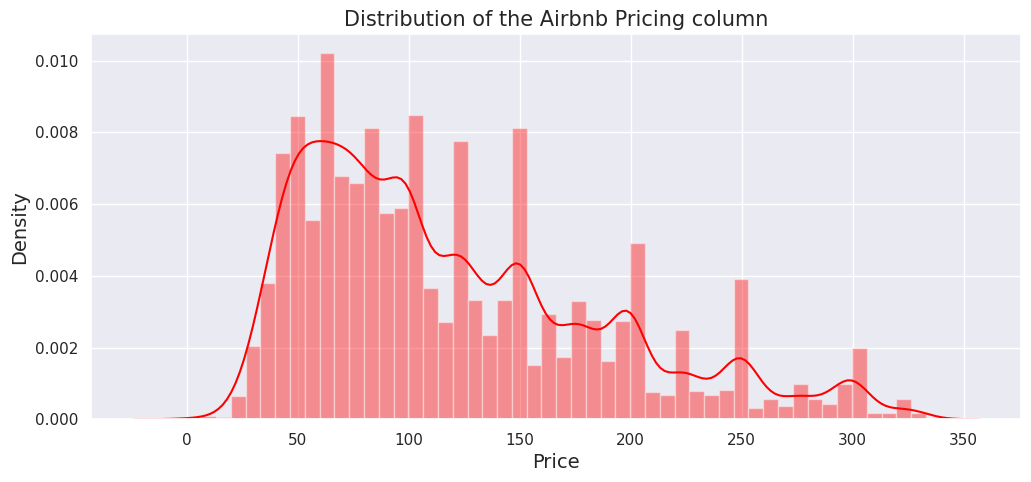

In [34]:
# using histogram we carry out the distribution for the price column

# it gives insights to the more densed/ populated segement of the data
# it also gives insights about density and volume of the presence of data

plt.figure(figsize=(12,5))

sns.set_theme(style='darkgrid')

sns.distplot(df['price'],color='red')

plt.xlabel('Price',fontsize=14)
plt.ylabel('Density',fontsize=14)

plt.title('Distribution of the Airbnb Pricing column',fontsize=15)

In [35]:
import plotly.express as px
import pandas as pd

fig = px.histogram(df, x='price', nbins=10, title='Distribution of the Airbnb Pricing column',
                   labels={'price': 'Price', 'count': 'Density'})
fig.update_layout(xaxis_title='Price', yaxis_title='Density', bargap=0.1)
fig.show()


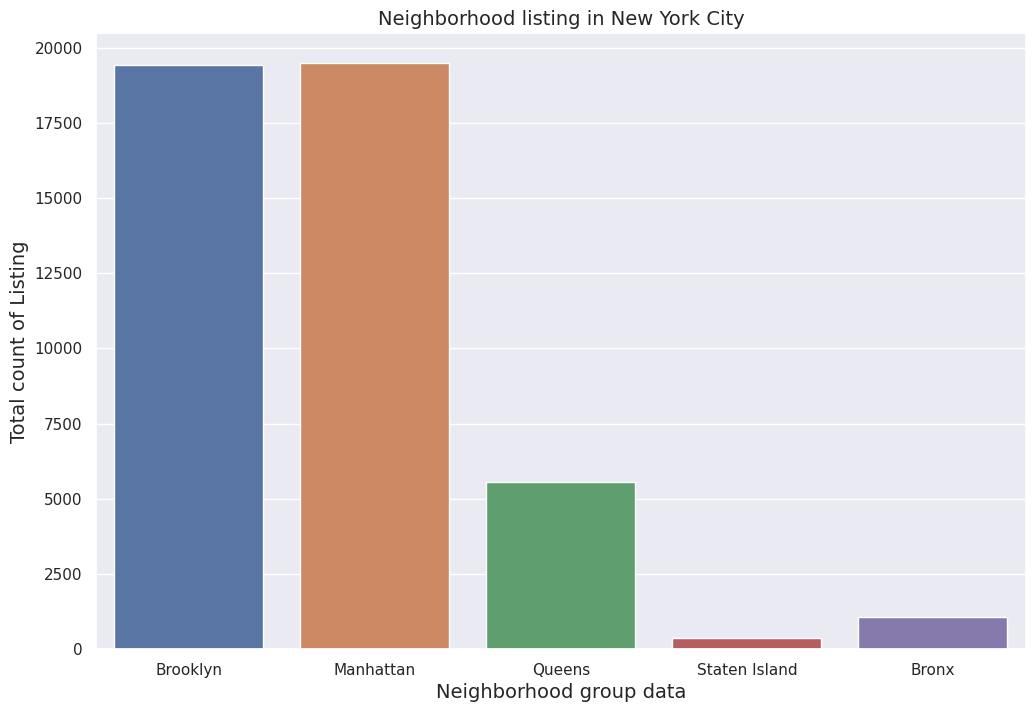

In [36]:
# neighborhood_group column is being used for the count plot to understand the distribution of the categorical data

plt.figure(figsize=(12,8))

sns.countplot(data=df, x='neighbourhood_group')

plt.title('Neighborhood listing in New York City',fontsize=14)

plt.xlabel('Neighborhood group data',fontsize=14)

plt.ylabel('Total count of Listing',fontsize=14)

plt.show()

In [37]:
fig = px.histogram(df, x='neighbourhood_group', title='Neighborhood listing in New York City',
                   labels={'neighbourhood_group': 'Neighborhood group', 'count': 'Total count of Listing'})
fig.update_layout(xaxis_title='Neighborhood group data', yaxis_title='Total count of Listing')
fig.show()


Text(0.5, 1.0, 'Avg price v/s neighbourhood')

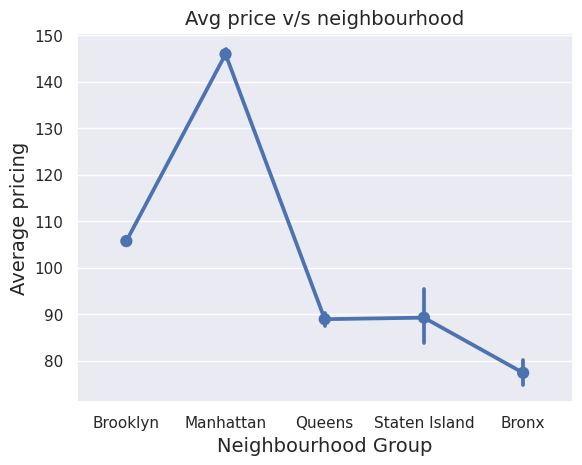

In [38]:
# neighbourhood_group column being used to calculate the avg pricing in each of these neighborhoods by using point plot
# we use mean over here to calculate the avg pricing
# point plot to do so

from statistics import mean

sns.pointplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean)

plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average pricing',fontsize=14)

plt.title('Avg price v/s neighbourhood',fontsize=14)

In [41]:
!pip install sweetviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 55.8 MB/s eta 0:00:00


In [42]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
